# Walmart Sales Predicter

# Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the sales of Walmart stores is affected by other variables such as Holiday_Flag, Temperature	, Fuel_Price, CPI and Unemployment.


### 2) Data Collection
- The data consists of 8 column and 6435 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from IPython import display
# display.Image('https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg')

In [21]:
df =pd.read_csv(r"C:\Data Science\csv files\Walmart.csv")

In [22]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
df.shape

(6435, 8)

### 2.2 Dataset information

- Store : Store No.  -> 1 to 45
- Date : Starting date of a week
- Holiday_Flag : Any holiday in respective week or not -> 1 - yes and 0 - no
- Temperature : Average Temp of respective week
- Fuel_Price - in store area
- CPI - in store area
- Unemployment - in store area

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [14]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### There are no duplicates  values in the data set

### 3.2 Check Duplicates

In [15]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### 3.4 Checking the number of unique values of each column

In [17]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

### 3.5 Check statistics of data set

In [18]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### 3.7 Exploring Data

In [20]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [25]:
print("Categories in 'Store' variable:     ",end=" " )
print(df['Store'].unique())
print()
print("Categories in 'Holiday_Flag' variable:     ",end=" " )
print(df['Holiday_Flag'].unique())

Categories in 'Store' variable:      [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

Categories in 'Holiday_Flag' variable:      [0 1]


In [24]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

We have 1 categorical features : ['Date']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

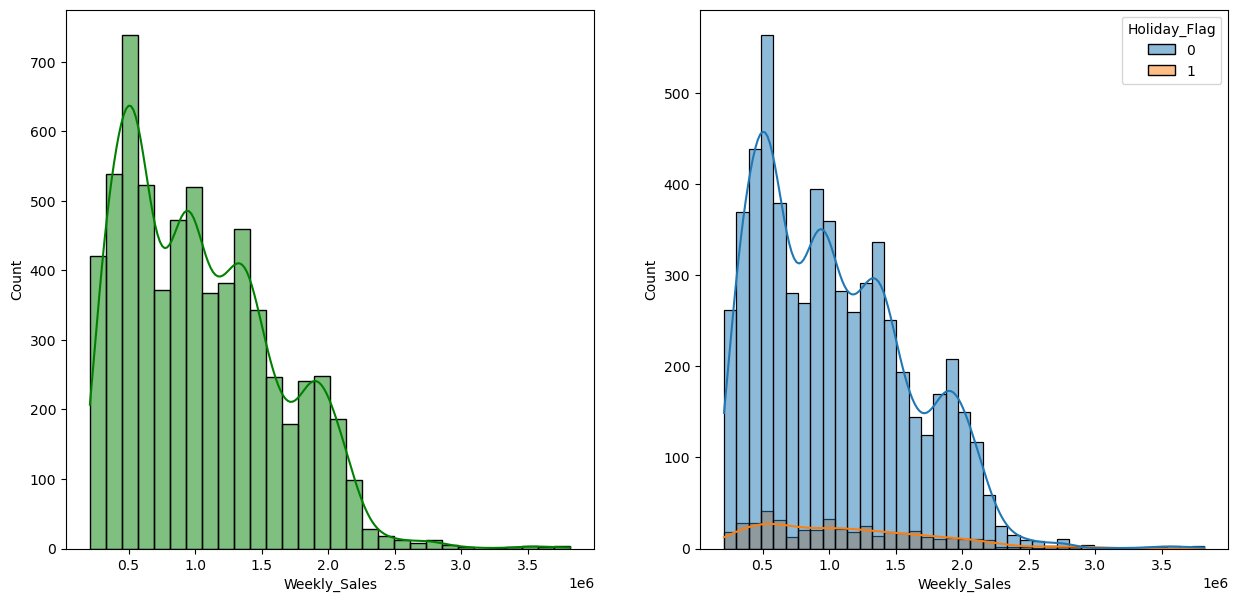

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Weekly_Sales',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Weekly_Sales',kde=True,hue='Holiday_Flag')
plt.show()

In [27]:
# These are right skewed graph
# holiday week has very less weekly sales

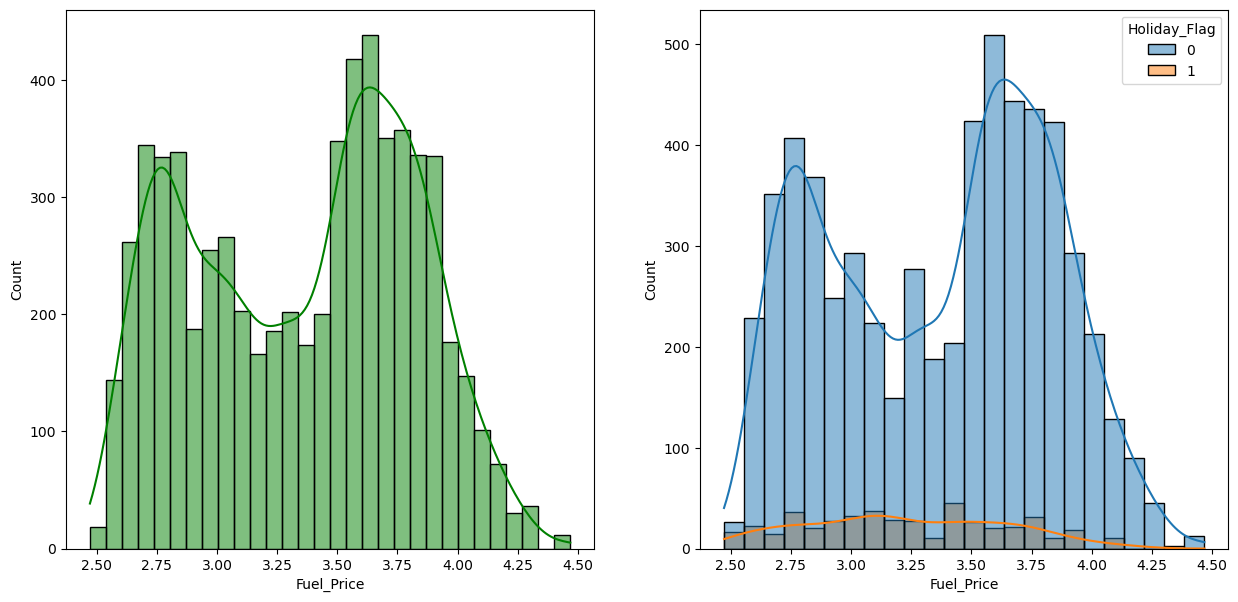

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Fuel_Price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Fuel_Price',kde=True,hue='Holiday_Flag')
plt.show()

# I. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [11]:
df_new = walmart_df[['Store', 'Weekly_Sales', 'Unemployment']].groupby('Store').mean()

In [12]:
df_new.head()

,Weekly_Sales,Unemployment
Store,,
1,1.555264e+06,7.610420
2,1.925751e+06,7.623846
3,4.027044e+05,7.176986
4,2.094713e+06,5.964692
5,3.180118e+05,6.295406


In [13]:
df_new['Weekly_Sales'].mean()

1046964.8775617717

In [14]:
df_new['Unemployment'].mean()

7.999151048951049

In [15]:
stores_df = df_new[(df_new['Weekly_Sales'] < df_new['Weekly_Sales'].mean()) & (df_new['Unemployment'] > df_new['Unemployment'].mean())]

In [16]:
stores_df.head()

,Weekly_Sales,Unemployment
Store,,
7,5.706173e+05,8.585734
12,1.009002e+06,13.116483
22,1.028501e+06,8.069371
29,5.394514e+05,9.806385
33,2.598617e+05,8.533154


In [17]:
stores_df.reset_index(inplace = True)

In [18]:
stores_df

,Store,Weekly_Sales,Unemployment
0,7,5.706173e+05,8.585734
1,12,1.009002e+06,13.116483
2,22,1.028501e+06,8.069371
3,29,5.394514e+05,9.806385
4,33,2.598617e+05,8.533154
5,34,9.667816e+05,9.934804
6,35,9.197250e+05,8.788573
7,38,3.857317e+05,13.116483
8,42,5.564039e+05,8.362965
9,43,6.333247e+05,9.934804


In [19]:
affected_stores = stores_df.Store.unique()
affected_stores

array([ 7, 12, 22, 29, 33, 34, 35, 38, 42, 43, 45], dtype=int64)

In [20]:
#So, store which are affected by are unemployment rate :- 7, 12, 15, 22, 26, 29, 33, 34, 36, 37, 38, 42, 43, 45

# II. Does temperature affect the weekly sales in any manner?

In [21]:
#Average Temperature
walmart_df['Temperature'].mean()

60.66378243978244

In [22]:
low = walmart_df[(walmart_df['Temperature'] >= walmart_df['Temperature'].min()) & (walmart_df['Temperature'] <= 30)]

In [23]:
low_temp_avg_sales = low['Weekly_Sales'].mean()

In [24]:
med = walmart_df[(walmart_df['Temperature'] > 30) & (walmart_df['Temperature'] <= 61)]

In [25]:
med_temp_avg_sales = med['Weekly_Sales'].mean()

In [26]:
high = walmart_df[(walmart_df['Temperature'] > 61) & (walmart_df['Temperature'] <= walmart_df['Temperature'].max())]

In [27]:
high_temp_avg_sales = high['Weekly_Sales'].mean()

In [28]:
print(low_temp_avg_sales)
print(med_temp_avg_sales)
print(high_temp_avg_sales)

1017732.7900968521
1083785.0625505918
1022175.2177431678


In [29]:
l=[low_temp_avg_sales,med_temp_avg_sales,high_temp_avg_sales]
label=['-3-30','30-61','61-100']

Text(0, 0.5, 'Weekly Sales')

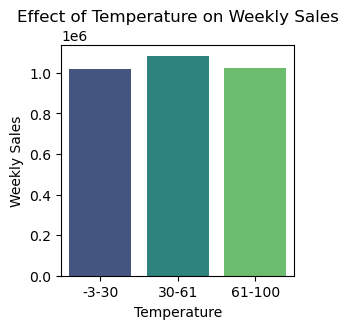

In [30]:
plt.figure(figsize=(3,3))
sns.barplot(x=label, y=l,palette='viridis') 
plt.title('Effect of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

In [31]:
walmart_df[['Weekly_Sales', 'Temperature']].corr()*100

,Weekly_Sales,Temperature
Weekly_Sales,100.000000,-6.381001
Temperature,-6.381001,100.000000


In [32]:
##Ans: Temperature is having a very little negitive affect on weekly sales.
# Average weekly sales is almost same when temp is high and low and little high when temp is medium

# III. Top performing stores according to the historical data.

In [33]:
df_new4 = walmart_df[['Store', 'Weekly_Sales']].groupby('Store').sum()

In [34]:
df_new4.head()

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07


In [35]:
df_new4.sort_values(by = 'Weekly_Sales', ascending = False).head(10)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


# IV. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [36]:
df_new5 = df_new4.sort_values(by = 'Weekly_Sales', ascending = True)

In [37]:
df_new5.head(10)

,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42
3,57586735.07
30,62716885.12
37,74202740.32
16,74252425.40


In [38]:
lowest_performing_store = df_new5.iloc[0, 0]

In [39]:
lowest_performing_store

37160221.96

In [40]:
highest_performing_store = df_new5.iloc[-1, 0]

In [41]:
highest_performing_store

301397792.46

In [42]:
diff = highest_performing_store - lowest_performing_store

In [43]:
diff

264237570.49999997

# V. How does cost of fuel price affect sales

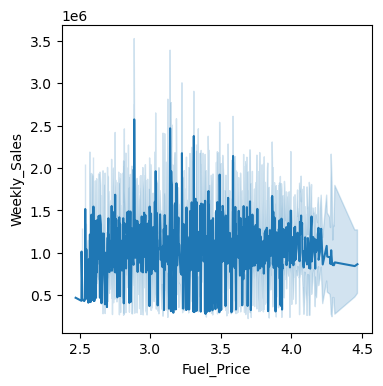

In [44]:
plt.figure(figsize=(4,4))
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=walmart_df)
plt.show()

In [45]:
minfuel=walmart_df[walmart_df['Fuel_Price']==walmart_df['Fuel_Price'].min()]['Weekly_Sales'].values
maxfuel=walmart_df[walmart_df['Fuel_Price']==walmart_df['Fuel_Price'].max()]['Weekly_Sales'].values
print(minfuel)
print(maxfuel)

[470281.03]
[1713889.11  934917.47 1205536.71  291781.15  437320.66  612379.9 ]


In [46]:
f=[minfuel[0],maxfuel.mean()]
f

[470281.03, 865970.8333333334]

In [47]:
price=[walmart_df['Fuel_Price'].min(),walmart_df['Fuel_Price'].max()]
col=['Lowest Fuel Price','Highest Fuel Price']

In [48]:
fuel_df=pd.DataFrame(f, index = col, columns=['Weekly Sales'])
fuel_df['Price']=price
fuel_df

,Weekly Sales,Price
Lowest Fuel Price,470281.030000,2.472
Highest Fuel Price,865970.833333,4.468


In [49]:
maxfuel.mean()-minfuel[0]

395689.80333333334

# VI. Target Variable Distribution:

C:\Users\punit\AppData\Local\Temp\ipykernel_19840\3505964321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_df['Weekly_Sales'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


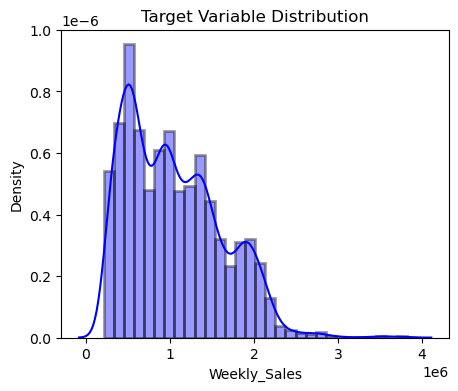

In [50]:
plt.figure(figsize=(5,4))
sns.distplot(walmart_df['Weekly_Sales'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

# Firstly, we will do model building using 
# Linear Regression Algo

In [51]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [52]:
walmart_df.shape

(6435, 8)

# Outlier Analysis

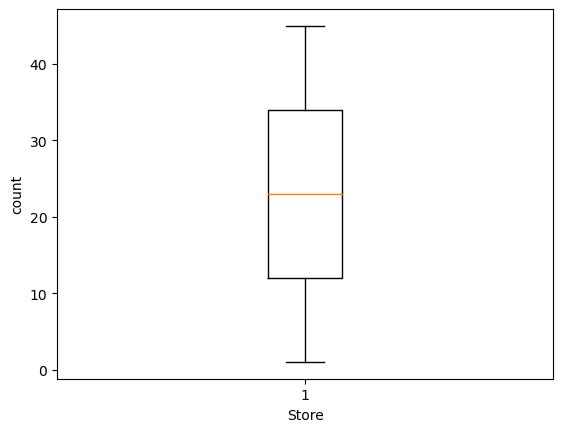

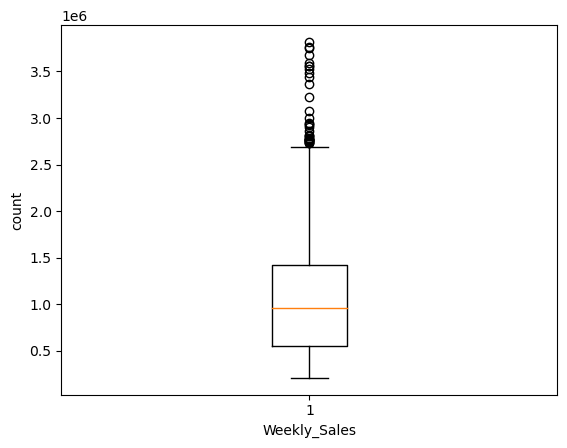

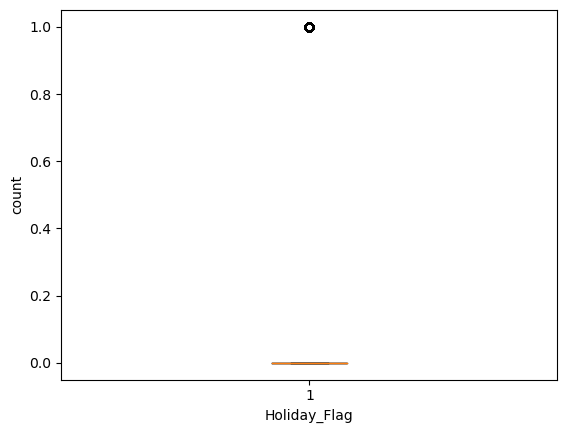

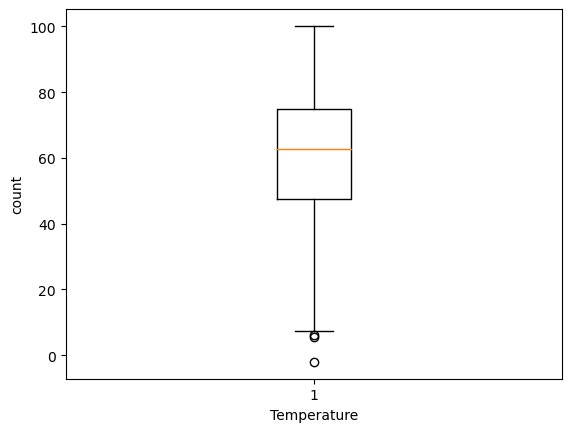

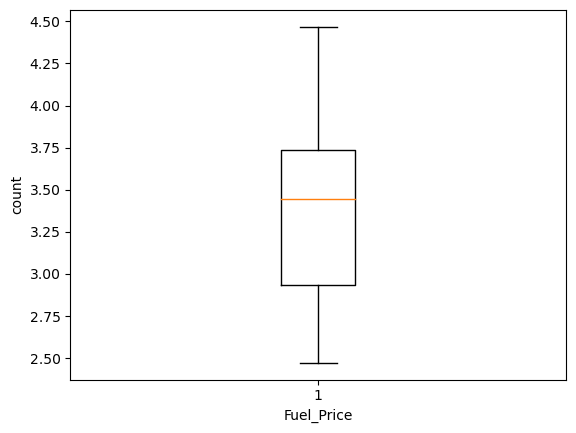

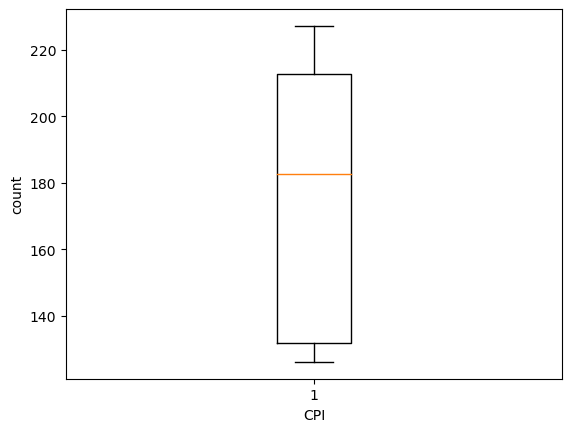

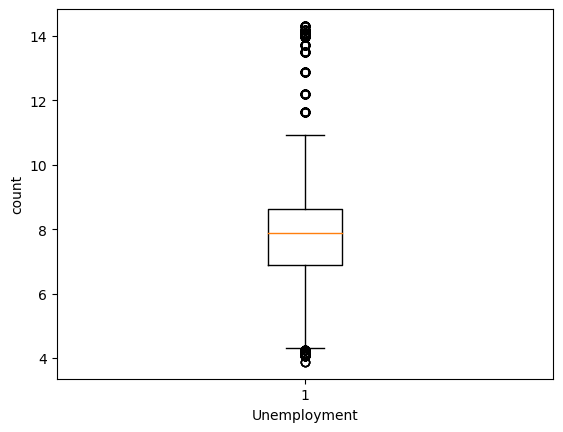

In [53]:
for col in walmart_df.columns:
    if walmart_df[col].dtypes != 'object':
        plt.boxplot(walmart_df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [54]:
outl_cols = ['Weekly_Sales', 'Temperature', 'Unemployment']

In [55]:
for col in outl_cols:
    q1 = walmart_df[col].quantile(0.25)
    q3 = walmart_df[col].quantile(0.75)
    
    IQR = q3 - q1
    
    walmart_df = walmart_df[(walmart_df[col] >= q1 - 1.5*IQR) & (walmart_df[col] <= q3 + 1.5*IQR)]

In [56]:
walmart_df.shape

(5917, 8)

In [57]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [58]:
X=walmart_df.drop(['Date', 'Weekly_Sales'],axis=1)
y=walmart_df['Weekly_Sales']

In [59]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684
6431,45,0,64.89,3.985,192.170412,8.667
6432,45,0,54.47,4.000,192.327265,8.667
6433,45,0,56.47,3.969,192.330854,8.667


In [60]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5917, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4733, 6)
(1184, 6)
(4733,)
(1184,)


In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
X_train

array([[-1.4511529 , -0.26519835, -1.31403608, -1.73564311, -1.23920658,
         0.72027745],
       [ 1.47215277, -0.26519835,  1.6523663 ,  1.0239075 , -1.17388534,
         0.61667859],
       [-0.91264922, -0.26519835,  0.03462695,  0.47504661,  1.27090835,
        -0.71725716],
       ...,
       [ 1.39522367, -0.26519835,  0.56293534, -1.40676217,  0.38734523,
        -0.314105  ],
       [ 1.47215277, -0.26519835, -0.07256606, -0.46150175, -1.23012343,
         1.0254524 ],
       [-1.22036561, -0.26519835, -0.04850232, -1.31746338,  0.40072124,
         1.03669568]])

In [65]:
X_test

array([[-0.91264922, -0.26519835,  0.71989653,  0.83659783,  1.32705164,
        -1.11800005],
       [-0.37414555, -0.26519835, -0.9465172 , -0.81869693, -1.07328033,
         1.28886656],
       [-1.06650741, -0.26519835,  1.38493069,  0.47286859,  1.14550233,
        -1.06178361],
       ...,
       [-0.52800374, -0.26519835, -2.56152204, -0.70979596,  0.4384676 ,
        -0.8931343 ],
       [-0.45107464, -0.26519835, -1.0165208 ,  0.50118284, -1.15517946,
        -0.89072502],
       [-1.3742238 , -0.26519835, -0.66869043,  0.37703573,  1.19063605,
        -1.43200901]])

In [66]:
from sklearn.linear_model import LinearRegression

l_model = LinearRegression()
l_model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred =l_model.predict(X_test)

In [68]:
y_pred

array([1102599.71941607, 1198162.77128515, 1138958.54424941, ...,
       1111440.04974775, 1230318.71486016, 1207074.04208547])

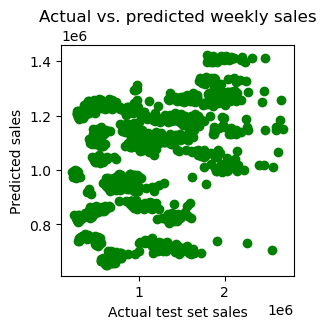

In [69]:
plt.figure(figsize=(3,3))
plt.title("Actual vs. predicted weekly sales")
plt.xlabel("Actual test set sales")
plt.ylabel("Predicted sales")
plt.scatter(x=y_test,y=y_pred,color='green')

In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 433670.0004882722
Mean Squared Error: 273919580232.83276
Root Mean Squared Error: 523373.2704607991
R Square: 0.13584568464568914


In [71]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
y_pred_rf =rf.predict(X_test)

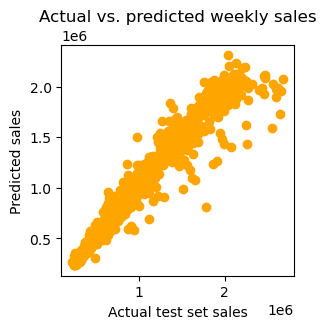

In [72]:
plt.figure(figsize=(3,3))
plt.title("Actual vs. predicted weekly sales")
plt.xlabel("Actual test set sales")
plt.ylabel("Predicted sales")
plt.scatter(x=y_test,y=y_pred_rf,color='orange')

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R Square:', metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 72581.73628488179
Mean Squared Error: 16767908012.07095
Root Mean Squared Error: 129490.95725984478
R Square: 0.9471010431025828


In [74]:
walmart_df2 =pd.read_csv(r"C:\csv files\Walmart DataSet.csv")

In [75]:
walmart_df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [76]:
walmart_df2 = walmart_df2[['Store', 'Date', 'Weekly_Sales']]

In [77]:
walmart_df2.head()

,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68


In [78]:
walmart_df2.shape

(6435, 3)

In [79]:
walmart_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


In [80]:
walmart_df2['Date'] = pd.to_datetime(walmart_df2['Date'], format = '%d-%m-%Y')

In [81]:
walmart_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB


In [82]:
walmart_df2['Date'] = walmart_df2['Date'].dt.strftime('%Y-%m-%d')

In [83]:
walmart_df2.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [84]:
walmart_df2.set_index('Date', inplace = True)

In [85]:
walmart_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 150.8+ KB


In [86]:
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
storeId = 1

In [87]:
store = walmart_df2[walmart_df2.Store == storeId]

In [88]:
store

,Store,Weekly_Sales
Date,,
2010-02-05,1,1643690.90
2010-02-12,1,1641957.44
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-05,1,1554806.68
...,...,...
2012-09-28,1,1437059.26
2012-10-05,1,1670785.97
2012-10-12,1,1573072.81


In [89]:
store.drop('Store', axis = 1, inplace = True)

C:\Users\punit\AppData\Local\Temp\ipykernel_19840\761399920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store.drop('Store', axis = 1, inplace = True)


In [90]:
store

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


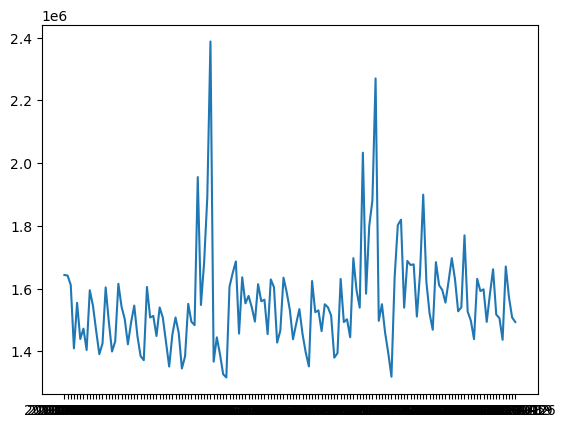

In [91]:
plt.plot(store)

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [93]:
decomposition = seasonal_decompose(store['Weekly_Sales'], period = 12)

Figure(640x480)


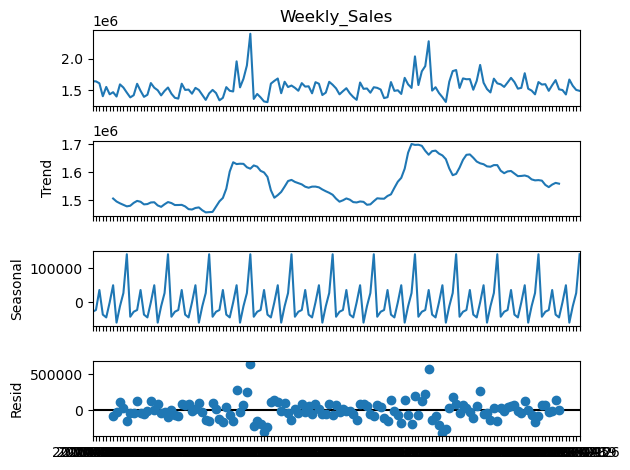

In [94]:
print(decomposition.plot())

In [95]:
from statsmodels.tsa.stattools import adfuller

In [96]:
#ad-fuller test

# ad-fuller Test-
# H0(null hypothesis)= data is non stationary
# HA(alternate hypothesis)=data is stationary

# if p value is more than 0.05 accept the null hypothesis

In [97]:
results=adfuller(store)

In [98]:
results[1]

1.3877788330759434e-05

In [99]:
#p-value is less than 0.05, data is stationary

In [100]:
train = store.iloc[:120,:]
test = store.iloc[120:,:]
train, test

(            Weekly_Sales
 Date                    
 2010-02-05    1643690.90
 2010-02-12    1641957.44
 2010-02-19    1611968.17
 2010-02-26    1409727.59
 2010-03-05    1554806.68
 ...                  ...
 2012-04-20    1521577.87
 2012-04-27    1468928.37
 2012-05-04    1684519.99
 2012-05-11    1611096.05
 2012-05-18    1595901.87
 
 [120 rows x 1 columns],
             Weekly_Sales
 Date                    
 2012-05-25    1555444.55
 2012-06-01    1624477.58
 2012-06-08    1697230.96
 2012-06-15    1630607.00
 2012-06-22    1527845.81
 2012-06-29    1540421.49
 2012-07-06    1769854.16
 2012-07-13    1527014.04
 2012-07-20    1497954.76
 2012-07-27    1439123.71
 2012-08-03    1631135.79
 2012-08-10    1592409.97
 2012-08-17    1597868.05
 2012-08-24    1494122.38
 2012-08-31    1582083.40
 2012-09-07    1661767.33
 2012-09-14    1517428.87
 2012-09-21    1506126.06
 2012-09-28    1437059.26
 2012-10-05    1670785.97
 2012-10-12    1573072.81
 2012-10-19    1508068.77
 2012-10-26

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2012-05-25 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  23 non-null     float64
dtypes: float64(1)
memory usage: 368.0+ bytes


In [102]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

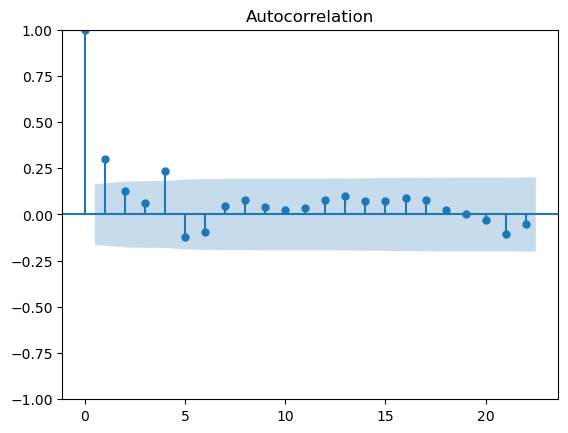

In [103]:
acf = plot_acf(store["Weekly_Sales"]) # So q = 4

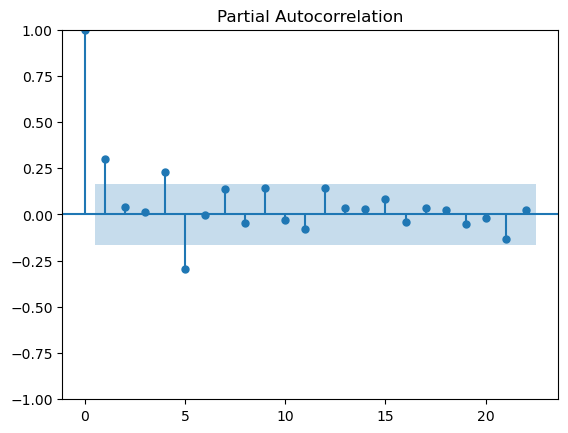

In [104]:
pacf = plot_pacf(store["Weekly_Sales"]) # So p = 5

In [105]:
from statsmodels.tsa.arima.model import ARIMA 

In [106]:
model = ARIMA(train, order =(5,0,4))  # order = (P,D,Q)
model_fit= model.fit()
store['Predict'] = model_fit.predict(start= len(train), end= len(train)+len(test)-1 )
store

C:\Users\punit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\punit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\punit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\punit\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\punit\AppData\Local\Temp\ipykernel_19840\4208658536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Weekly_Sales,Predict
Date,,
2010-02-05,1643690.90,NaN
2010-02-12,1641957.44,NaN
2010-02-19,1611968.17,NaN
2010-02-26,1409727.59,NaN
2010-03-05,1554806.68,NaN
...,...,...
2012-09-28,1437059.26,1.552080e+06
2012-10-05,1670785.97,1.551505e+06
2012-10-12,1573072.81,1.552737e+06


<Axes: xlabel='Date'>

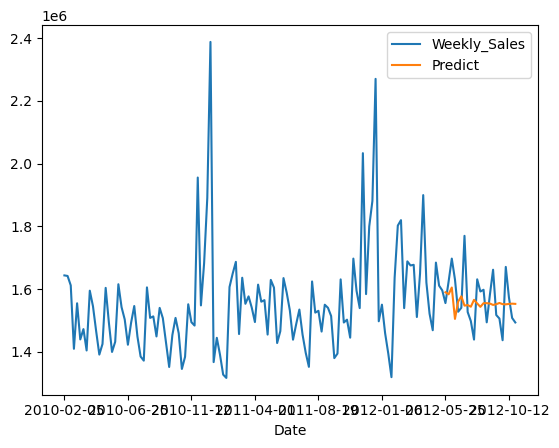

In [107]:
store[['Weekly_Sales','Predict']].plot()

In [108]:
# Forcasting weekly sales of next 12 weeks

In [109]:
from datetime import datetime,timedelta
forcast_end=datetime(2013,1,18)

In [110]:
type(model_fit.forecast(forcast_end))

pandas.core.series.Series

In [111]:
np.round(model_fit.forecast(forcast_end),0)

2012-05-25    1589885.0
2012-06-01    1583440.0
2012-06-08    1605086.0
2012-06-15    1505061.0
2012-06-22    1560264.0
2012-06-29    1577018.0
2012-07-06    1547354.0
2012-07-13    1549092.0
2012-07-20    1543900.0
2012-07-27    1565754.0
2012-08-03    1554266.0
2012-08-10    1543403.0
2012-08-17    1555194.0
2012-08-24    1555190.0
2012-08-31    1554022.0
2012-09-07    1549560.0
2012-09-14    1551881.0
2012-09-21    1555856.0
2012-09-28    1552080.0
2012-10-05    1551505.0
2012-10-12    1552737.0
2012-10-19    1553594.0
2012-10-26    1552960.0
2012-11-02    1551780.0
2012-11-09    1552867.0
2012-11-16    1553231.0
2012-11-23    1552635.0
2012-11-30    1552453.0
2012-12-07    1552696.0
2012-12-14    1553002.0
2012-12-21    1552696.0
2012-12-28    1552545.0
2013-01-04    1552772.0
2013-01-11    1552822.0
2013-01-18    1552720.0
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [112]:
forcast_df = pd.DataFrame(np.round(model_fit.forecast(forcast_end),0))

In [113]:
forcast_df.tail(12)

,predicted_mean
2012-11-02,1551780.0
2012-11-09,1552867.0
2012-11-16,1553231.0
2012-11-23,1552635.0
2012-11-30,1552453.0
2012-12-07,1552696.0
2012-12-14,1553002.0
2012-12-21,1552696.0
2012-12-28,1552545.0
2013-01-04,1552772.0
